# Question 2.a
Create an undirected network with n = 1000 nodes, with preferential attachment model, where each new node attaches to m = 1 old nodes. Is such a network always connected? 

In [1]:
library("igraph")


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




In [2]:
#create preferential attachment network
g=barabasi.game(1000,m=1,directed=F)
cat("The graph is connected: ",is_connected(g))


The graph is connected:  TRUE

# Question 2.b
 Use fast greedy method to ﬁnd the community structure. Measure modularity. 

In [3]:
#community structure list
community=cluster_fast_greedy(g)
#modularity
mod=modularity(community)
cat("Modularity is ",mod)

Modularity is  0.9335512

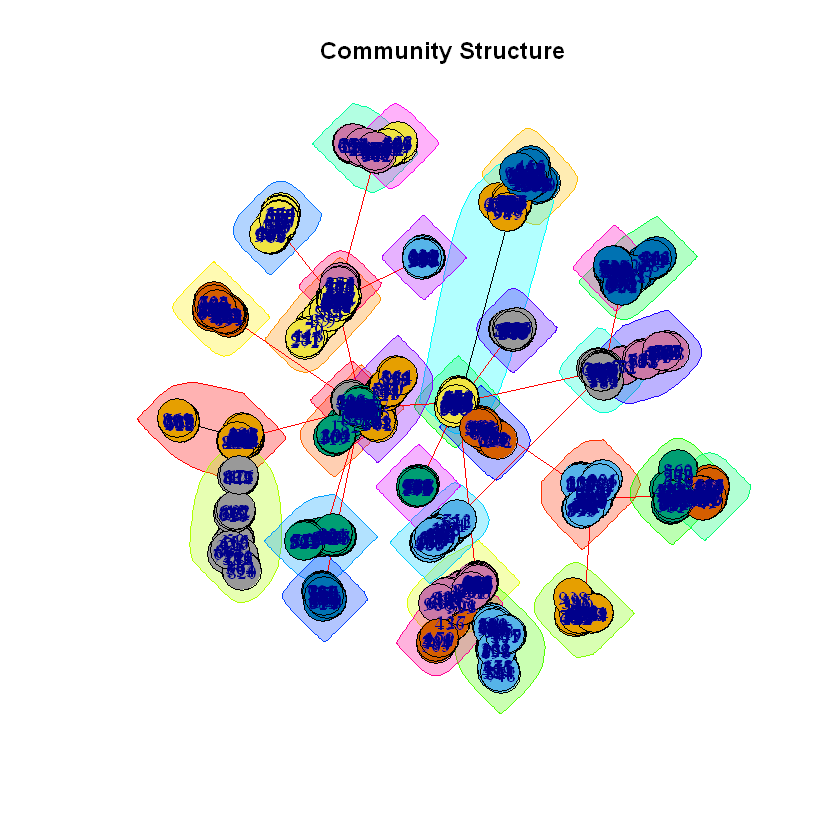

In [4]:
plot(community,g,main="Community Structure")

# Question 2.c
Try to generate a larger network with 10000 nodes using the same model. Compute modularity. How is it compared to the smaller network’s modularity?

The graph is connected:  TRUE 
Modularity is  0.978133 


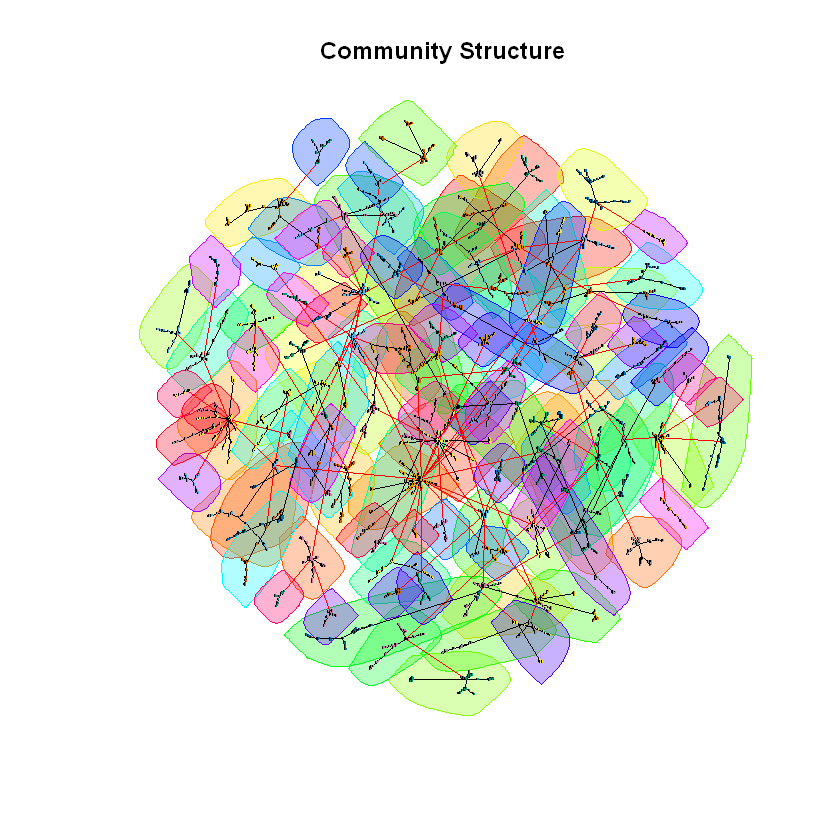

In [5]:
g=barabasi.game(10000,m=1,directed=F)
cat("The graph is connected: ",is_connected(g),"\n")
#community structure list
community=cluster_fast_greedy(g)
#modularity
mod=modularity(community)
cat("Modularity is ",mod,"\n")
plot(community,g,main="Community Structure",vertex.size=0.2,vertex.label=NA)

# Question 2.d
Plot the degree distribution in a log-log scale for both n = 1000,10000, then estimate the slope of the plot using linear regression.



Call:
lm(formula = log_dd ~ log_d)

Coefficients:
(Intercept)        log_d  
     0.9493      -2.6382  



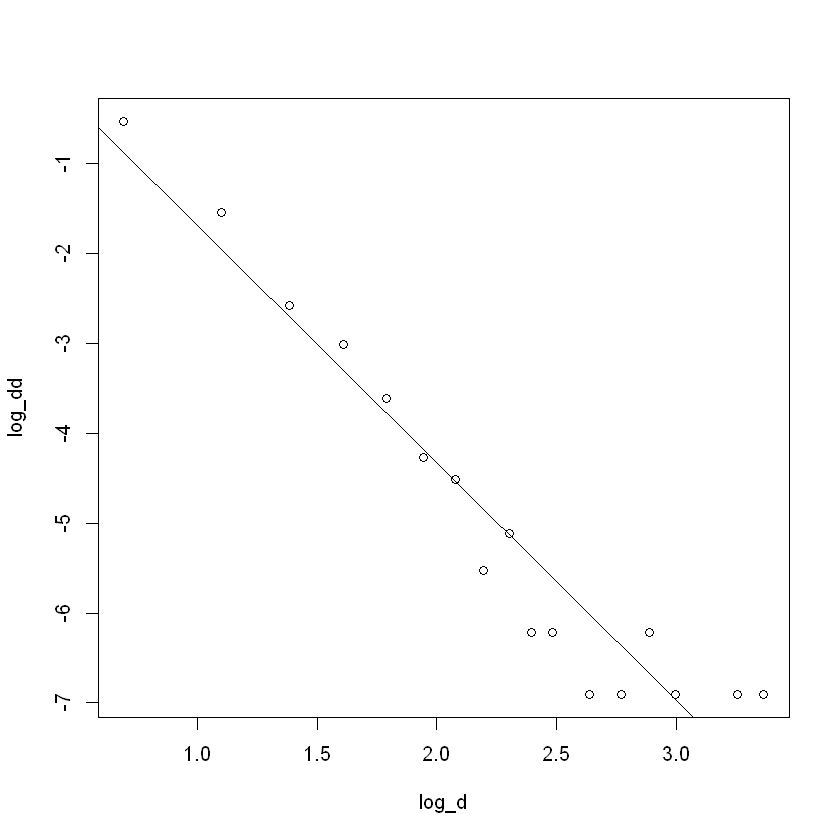

In [6]:
g1=barabasi.game(1000,m=1,directed=F)
dd=degree_distribution(g1)
#get index which is nonzero
index=which(dd!=0)
#extract degree distribution corresponding to nonzero index
log_dd=log(dd)[index]
log_d=log(seq(1:length(dd)))[index]

#Fit a linear model
model=lm(log_dd~log_d)
#plot scatter and model together
plot(log_d,log_dd,abline(model))
#print out coefficient of model
print(model)


Call:
lm(formula = log_dd2 ~ log_d2)

Coefficients:
(Intercept)       log_d2  
     0.3722      -2.5642  



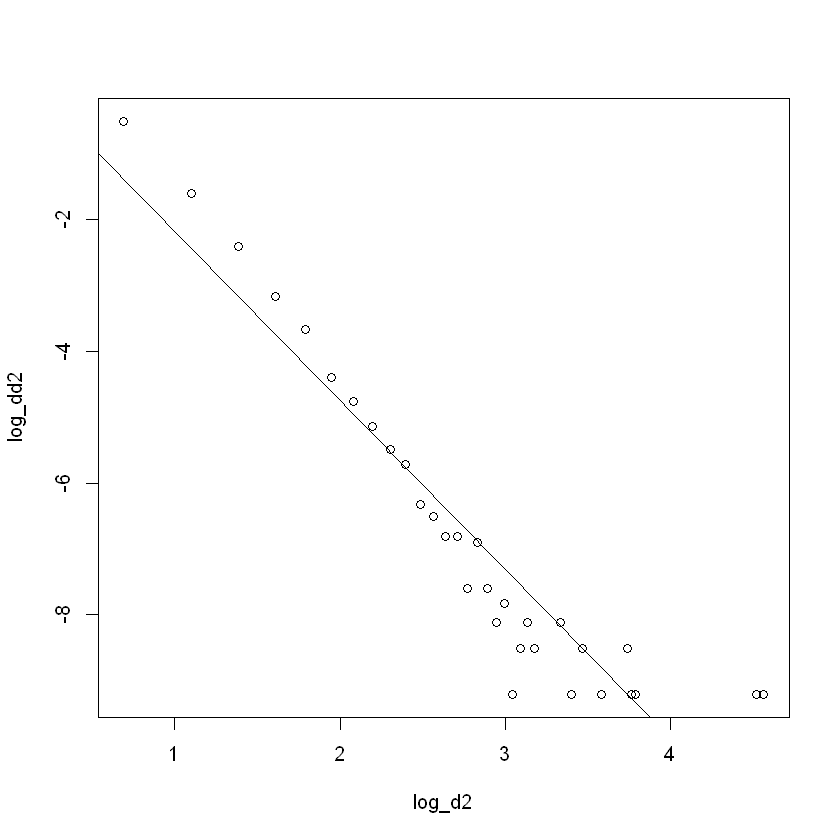

In [8]:
g2=barabasi.game(10000,m=1,directed=F)
dd2=degree_distribution(g2)
#get index which is nonzero
index=which(dd2!=0)
#extract degree distribution corresponding to nonzero index
log_dd2=log(dd2)[index]
log_d2=log(seq(1:length(dd2)))[index]

#Fit a linear model
model2=lm(log_dd2~log_d2)
#plot scatter and model together
plot(log_d2,log_dd2,abline(model2))
#print out coefficient of model
print(model2)

# Question 2.e
 In the two networks generated in 2(d), perform the following: Randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. Is the distribution linear in the log-log scale? If so, what is the slope? How does this diﬀer from the node degree distribution? 

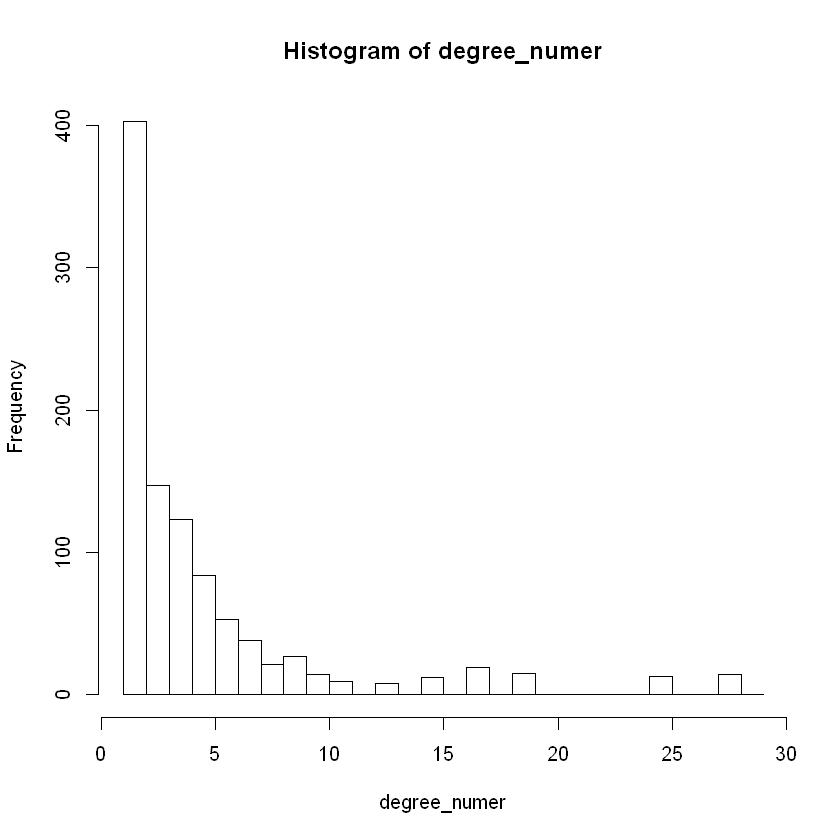


Call:
lm(formula = log_dd1 ~ log_d1)

Coefficients:
(Intercept)       log_d1  
     -1.188       -1.146  



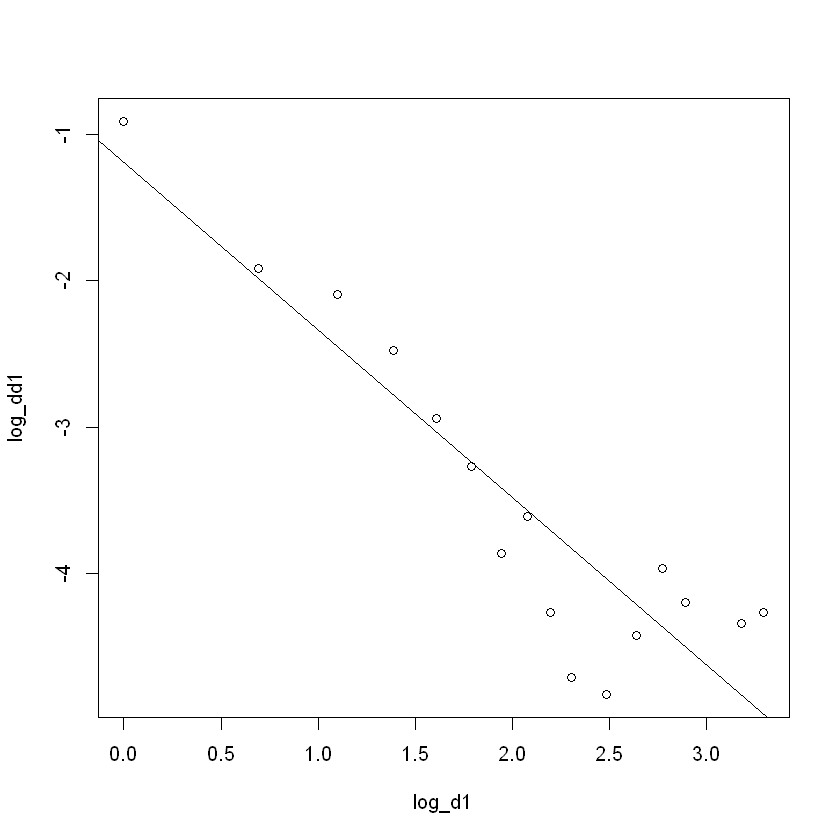

In [9]:
#For n=1000
#randomly choose a node and save index

iteration=1000
degree_list=vector(mode="list",length=0)
for (i in 1:iteration){
    node_index=sample(1000,1)
    nb_node_i=neighbors(g1,node_index)
    if (length(nb_node_i)==1){
        node_j=nb_node_i
    }else{
        node_j=sample(nb_node_i,1)
    }
    #save the corresponding node j's degree
    degree_list=c(degree_list,degree(g1,node_j))
}
degree_numer=unlist(degree_list,use.names=FALSE)
histogram=hist(degree_numer,seq(0:max(degree_numer)))
dd1=histogram$density

index=which(dd1!=0)
#extract degree distribution corresponding to nonzero index
log_dd1=log(dd1)[index]
log_d1=log(seq(1:length(dd1)))[index]

#Fit a linear model
model1=lm(log_dd1~log_d1)
#plot scatter and model together
plot(log_d1,log_dd1,abline(model1))
#print out coefficient of model
print(model1)


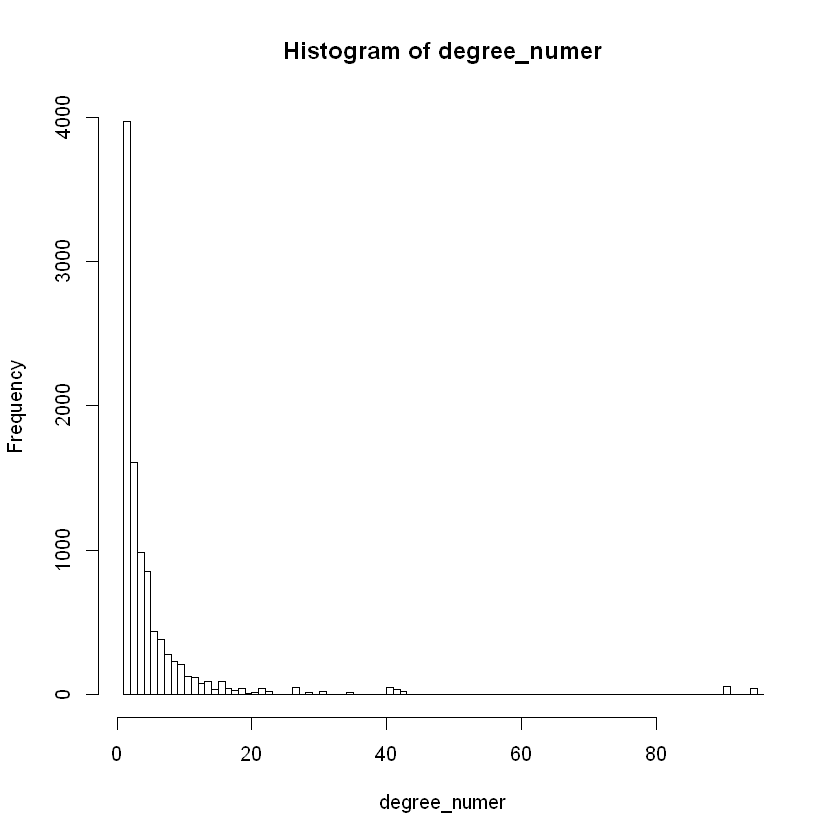


Call:
lm(formula = log_dd2 ~ log_d2)

Coefficients:
(Intercept)       log_d2  
     -1.423       -1.265  



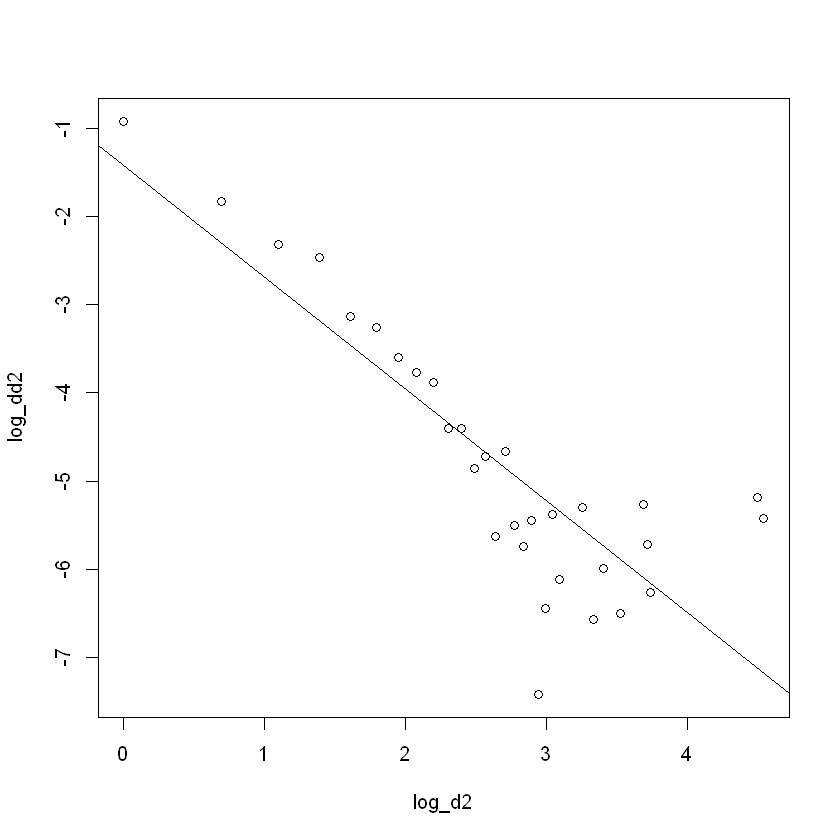

In [10]:
#For n=10000
#randomly choose a node and save index

iteration=10000
degree_list=vector(mode="list",length=0)
for (i in 1:iteration){
    node_index=sample(10000,1)
    nb_node_i=neighbors(g2,node_index)
    if (length(nb_node_i)==1){
        node_j=nb_node_i
    }else{
        node_j=sample(nb_node_i,1)
    }
    #save the corresponding node j's degree
    degree_list=c(degree_list,degree(g2,node_j))
}
degree_numer=unlist(degree_list,use.names=FALSE)
histogram=hist(degree_numer,seq(0:max(degree_numer)))
#use histogram to get distribution
dd2=histogram$density
#fine nonzero value index
index=which(dd2!=0)
#extract degree distribution corresponding to nonzero index
log_dd2=log(dd2)[index]
log_d2=log(seq(1:length(dd2)))[index]

#Fit a linear model
model2=lm(log_dd2~log_d2)
#plot scatter and model together
plot(log_d2,log_dd2,abline(model2))
#print out coefficient of model
print(model2)


# Question 2.f
Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000. Show the relationship between the age of nodes and their expected degree through an appropriate plot. 

[1] 3.794432


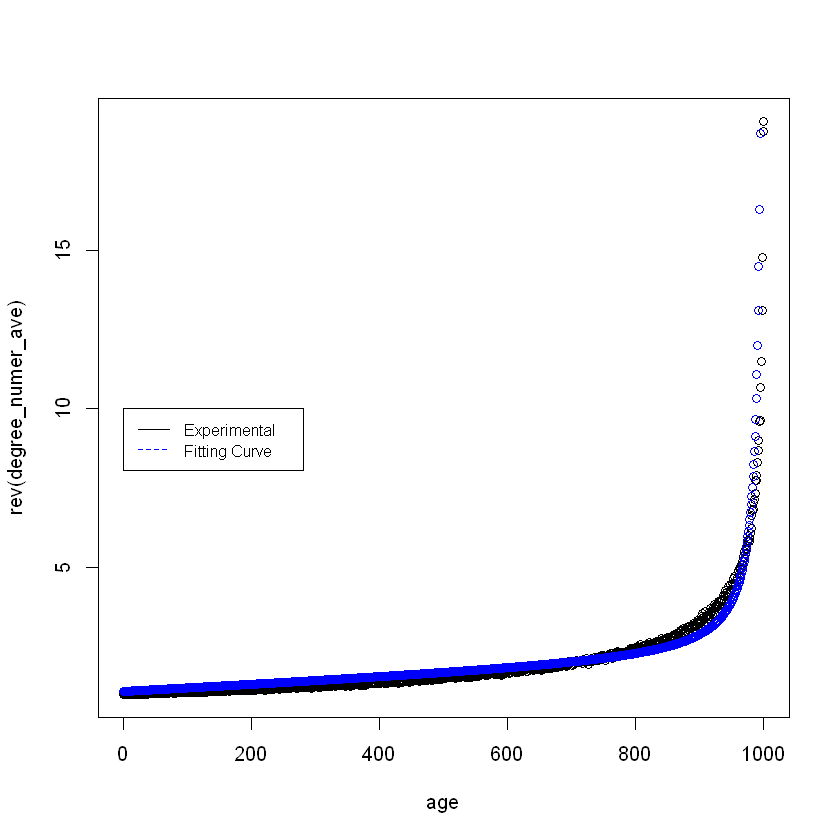

In [37]:
step_max=1000
age=seq(1:step_max)
degree_numer=vector(mode="numeric",length=step_max)
for (i in 1:step_max){
    gf=barabasi.game(1000,m=1,directed=F)#n=1000,m=1
    #calculate the sum of degree of each node
    degree_numer=degree_numer+degree(gf)
}
#Estimated Fitting Curve
m=1
Fit=100/(1000-age)+m*0.001*age+1
degree_numer_ave=degree_numer/step_max
plot(age,rev(degree_numer_ave))#node index need to be reversed to represent the age correspondingly
points(Fit,col='blue')
legend(0,10,legend=c("Experimental","Fitting Curve"),col=c("black","blue"),lty=1:2,cex=0.8)


# Question 2.g
Repeat the previous parts for m = 2, and m = 5. Compare the results of each part for diﬀerent values of m.

# m=2

In [13]:
#2.a
#create preferential attachment network
g=barabasi.game(1000,m=2,directed=F)
cat("The graph is connected ",is_connected(g))


The graph is connected  TRUE

Modularity is  0.5268936

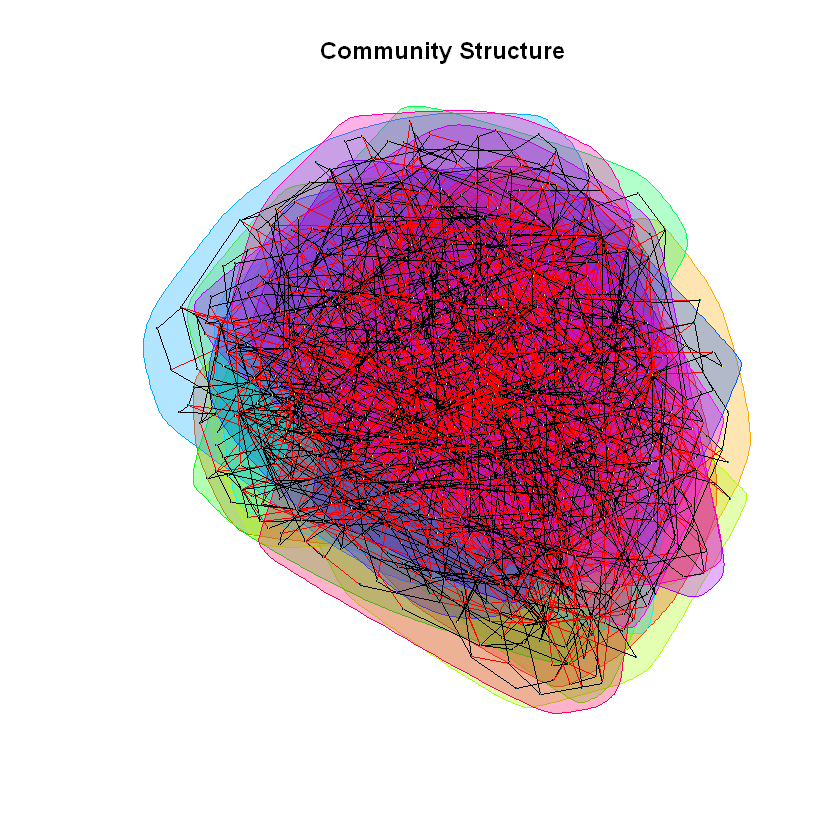

In [14]:
#2.b
#community structure list
community=cluster_fast_greedy(g)
#modularity
mod=modularity(community)
cat("Modularity is ",mod)
plot(community,g,main="Community Structure",vertex.label=NA,vertex.size=0.2)

[1] "The graph is connected: TRUE"
Modularity is  0.5318974

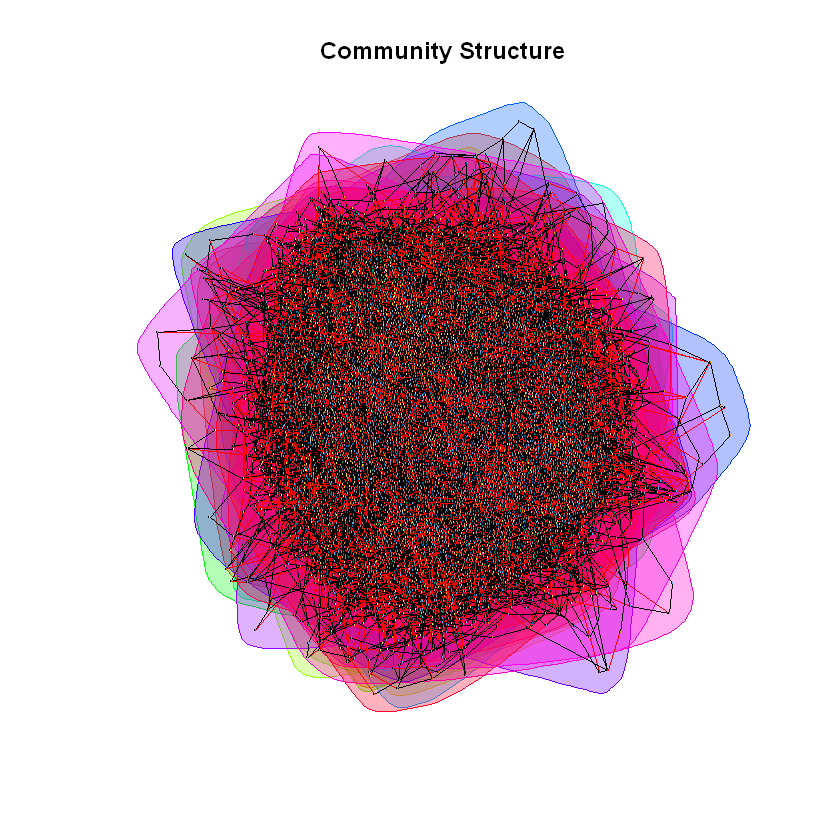

In [15]:
#2.c
g=barabasi.game(10000,m=2,directed=F)
print(sprintf("The graph is connected: %s",is_connected(g)))
#community structure list
community=cluster_fast_greedy(g)
#modularity
mod=modularity(community)
cat("Modularity is ",mod)
plot(community,g,main="Community Structure",vertex.size=0.2,vertex.label=NA)


Call:
lm(formula = log_dd ~ log_d)

Coefficients:
(Intercept)        log_d  
     0.9958      -2.2738  



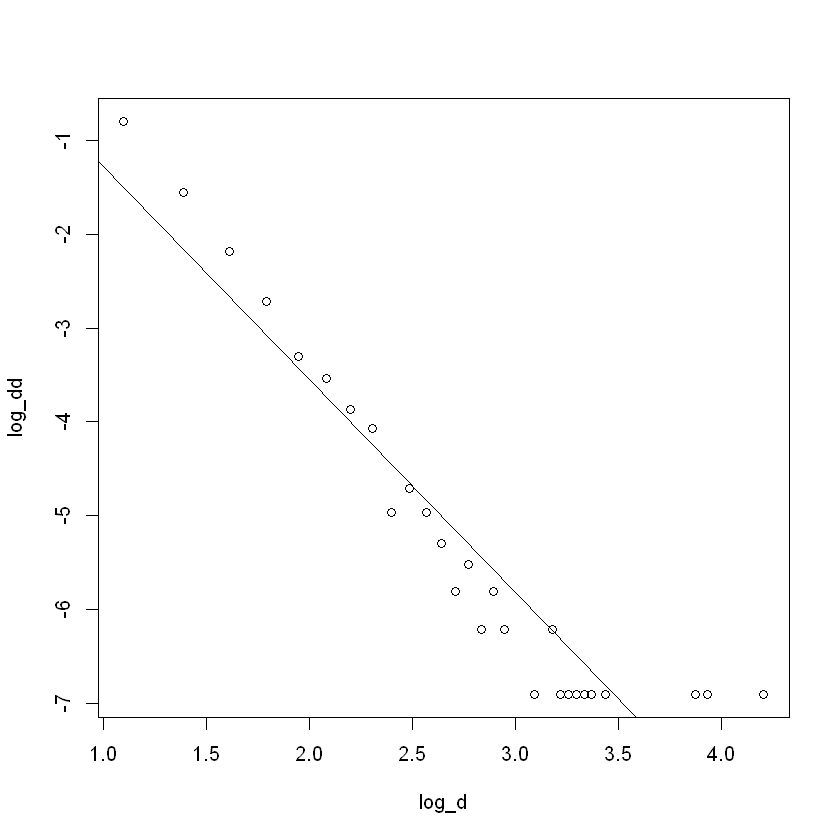

In [16]:
#2.d
g1=barabasi.game(1000,m=2,directed=F)
dd=degree_distribution(g1)
#get index which is nonzero
index=which(dd!=0)
#extract degree distribution corresponding to nonzero index
log_dd=log(dd)[index]
log_d=log(seq(1:length(dd)))[index]

#Fit a linear model
model=lm(log_dd~log_d)
#plot scatter and model together
plot(log_d,log_dd,abline(model))
#print out coefficient of model
print(model)


Call:
lm(formula = log_dd2 ~ log_d2)

Coefficients:
(Intercept)       log_d2  
      1.005       -2.438  



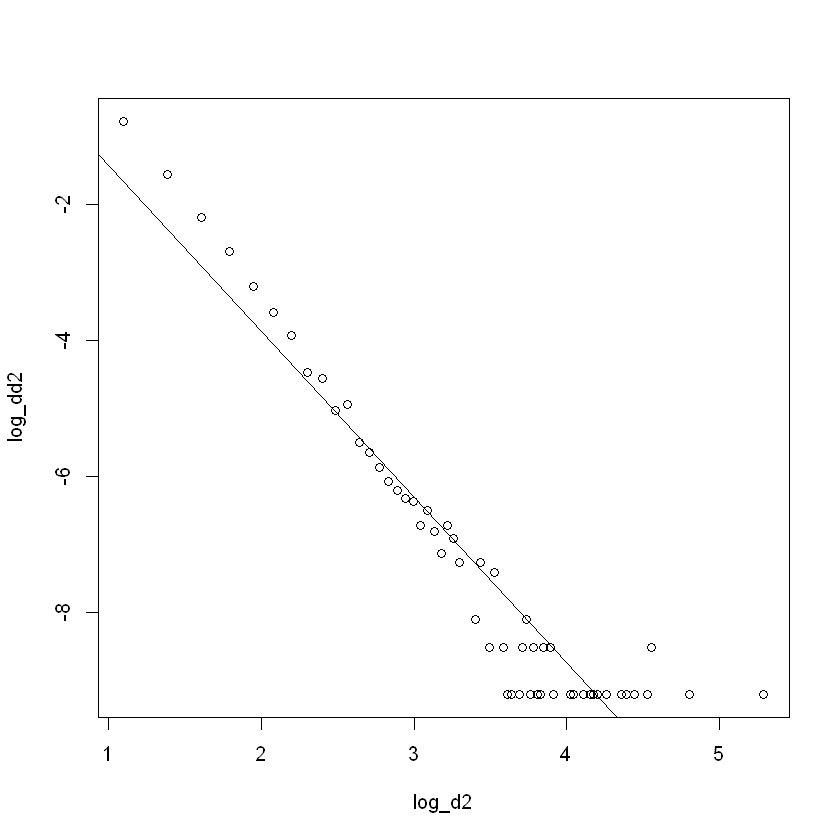

In [17]:
g2=barabasi.game(10000,m=2,directed=F)
dd2=degree_distribution(g2)
#get index which is nonzero
index=which(dd2!=0)
#extract degree distribution corresponding to nonzero index
log_dd2=log(dd2)[index]
log_d2=log(seq(1:length(dd2)))[index]

#Fit a linear model
model2=lm(log_dd2~log_d2)
#plot scatter and model together
plot(log_d2,log_dd2,abline(model2))
#print out coefficient of model
print(model2)

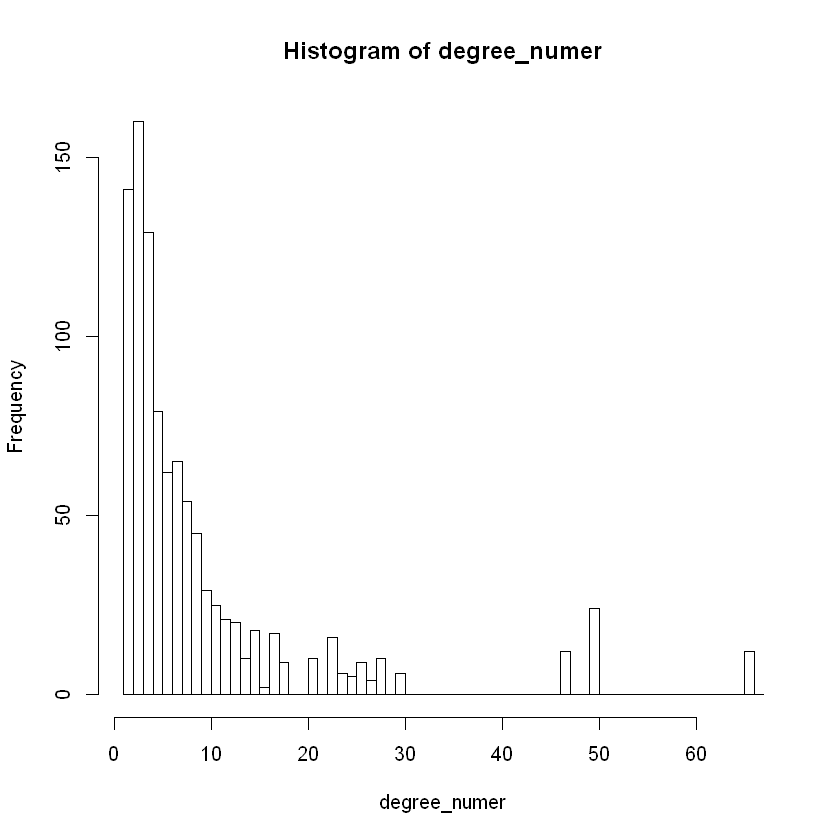


Call:
lm(formula = log_dd1 ~ log_d1)

Coefficients:
(Intercept)       log_d1  
     -1.598       -0.923  



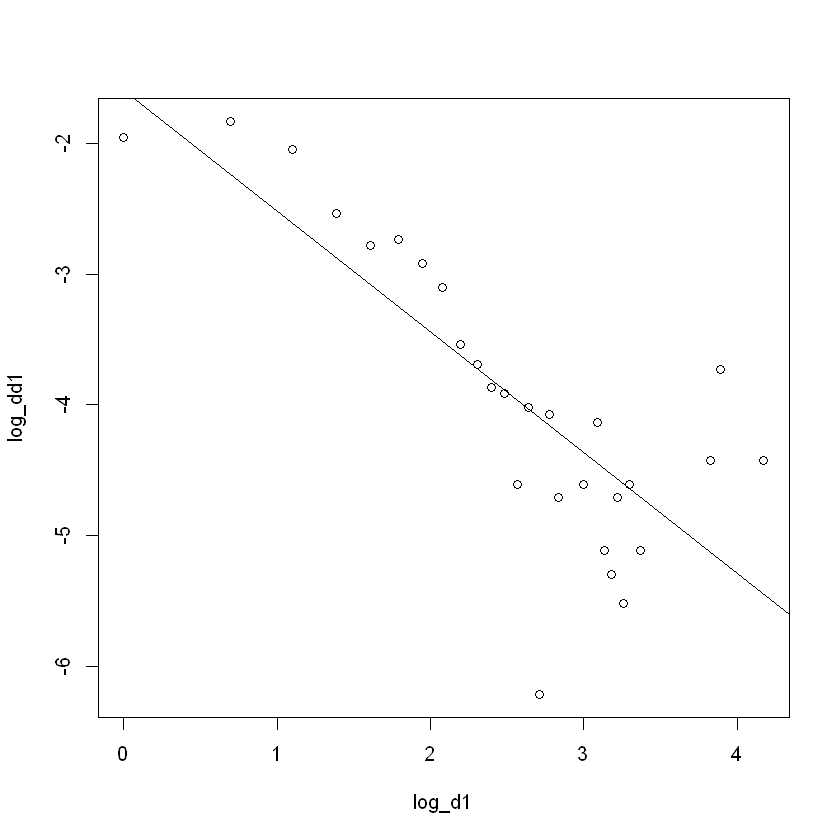

In [18]:
#2.e
#For n=1000
#randomly choose a node and save index

iteration=1000
degree_list=vector(mode="list",length=0)
for (i in 1:iteration){
    node_index=sample(1000,1)
    nb_node_i=neighbors(g1,node_index)
    if (length(nb_node_i)==1){
        node_j=nb_node_i
    }else{
        node_j=sample(nb_node_i,1)
    }
    #save the corresponding node j's degree
    degree_list=c(degree_list,degree(g1,node_j))
}
degree_numer=unlist(degree_list,use.names=FALSE)
histogram=hist(degree_numer,seq(0:max(degree_numer)))
dd1=histogram$density

index=which(dd1!=0)
#extract degree distribution corresponding to nonzero index
log_dd1=log(dd1)[index]
log_d1=log(seq(1:length(dd1)))[index]

#Fit a linear model
model1=lm(log_dd1~log_d1)
#plot scatter and model together
plot(log_d1,log_dd1,abline(model1))
#print out coefficient of model
print(model1)


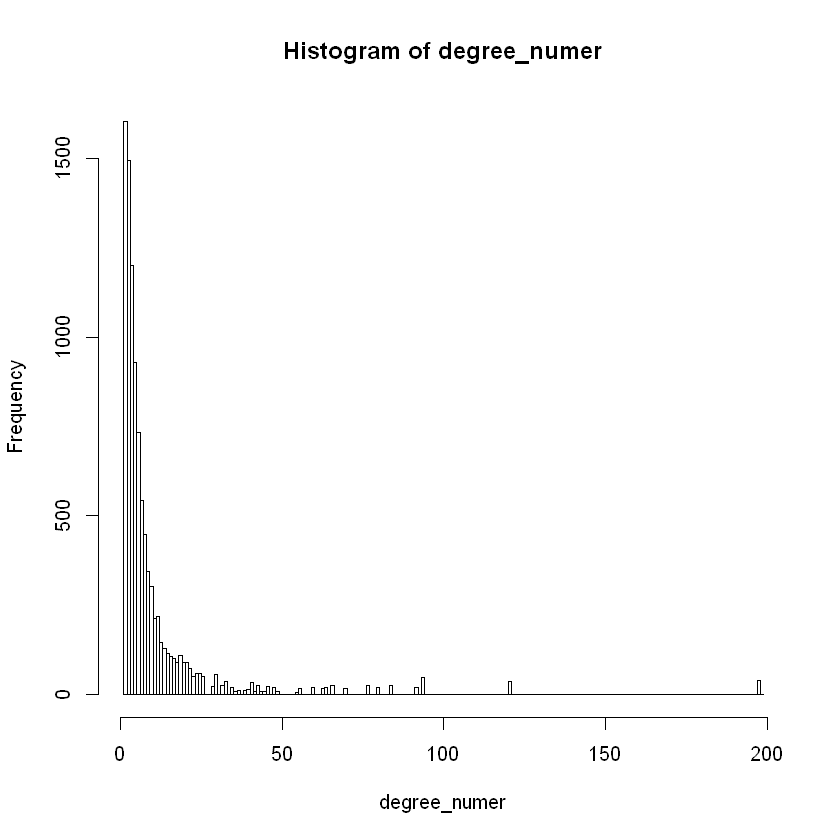


Call:
lm(formula = log_dd2 ~ log_d2)

Coefficients:
(Intercept)       log_d2  
     -1.335       -1.196  



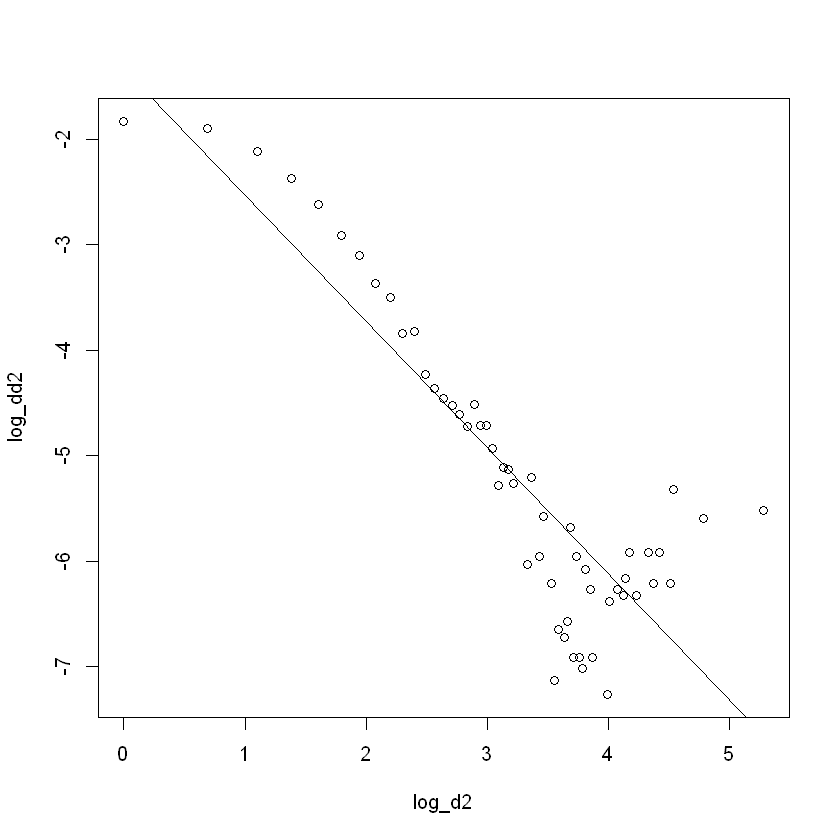

In [19]:
#For n=10000
#randomly choose a node and save index

iteration=10000
degree_list=vector(mode="list",length=0)
for (i in 1:iteration){
    node_index=sample(10000,1)
    nb_node_i=neighbors(g2,node_index)
    if (length(nb_node_i)==1){
        node_j=nb_node_i
    }else{
        node_j=sample(nb_node_i,1)
    }
    #save the corresponding node j's degree
    degree_list=c(degree_list,degree(g2,node_j))
}
degree_numer=unlist(degree_list,use.names=FALSE)
histogram=hist(degree_numer,seq(0:max(degree_numer)))
#use histogram to get distribution
dd2=histogram$density
#fine nonzero value index
index=which(dd2!=0)
#extract degree distribution corresponding to nonzero index
log_dd2=log(dd2)[index]
log_d2=log(seq(1:length(dd2)))[index]

#Fit a linear model
model2=lm(log_dd2~log_d2)
#plot scatter and model together
plot(log_d2,log_dd2,abline(model2))
#print out coefficient of model
print(model2)


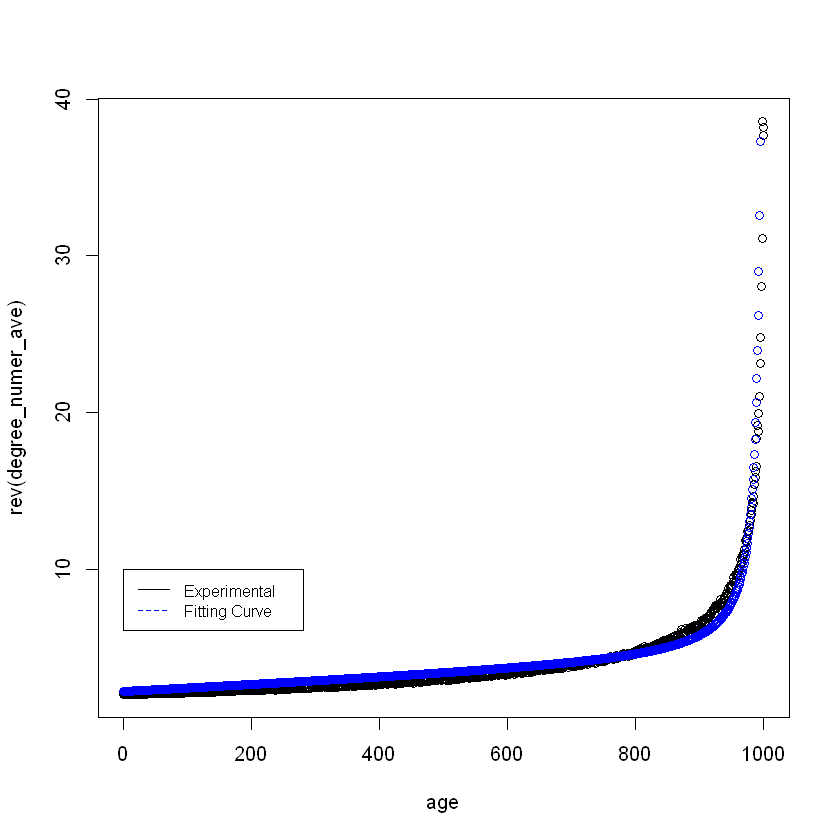

In [41]:
#2.f
step_max=1000
age=seq(1:step_max)
degree_numer=vector(mode="numeric",length=step_max)
for (i in 1:step_max){
    gf=barabasi.game(1000,m=2,directed=F)#n=1000,m=1
    #calculate the sum of degree of each node
    degree_numer=degree_numer+degree(gf)
}
#Estimated Fitting Curve
m=2
Fit=200/(1000-age)+m*0.001*age+m
degree_numer_ave=degree_numer/step_max
plot(age,rev(degree_numer_ave))#node index need to be reversed to represent the age correspondingly
points(Fit,col='blue')
legend(0,10,legend=c("Experimental","Fitting Curve"),col=c("black","blue"),lty=1:2,cex=0.8)

# m=5


In [20]:
#2.a
#create preferential attachment network
g=barabasi.game(1000,m=5,directed=F)
cat("The graph is connected: ",is_connected(g))


The graph is connected:  TRUE

Modularity is  0.2820821

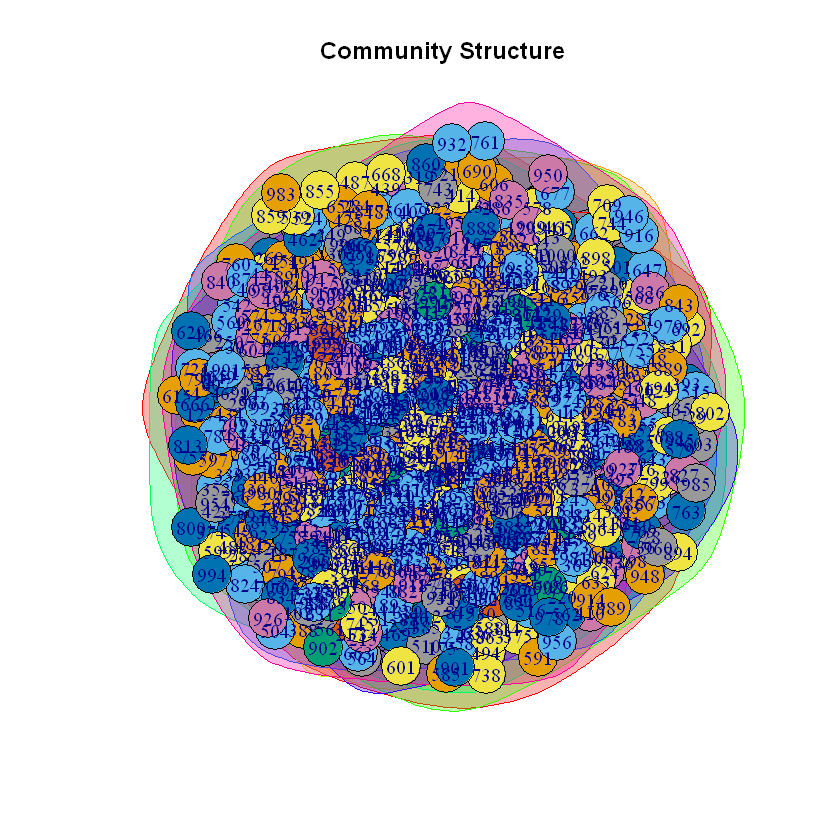

In [21]:
#2.b
#community structure list
community=cluster_fast_greedy(g)
#modularity
mod=modularity(community)
cat("Modularity is ",mod)
plot(community,g,main="Community Structure")

The graph is connected:  TRUEModularity is  0.27177

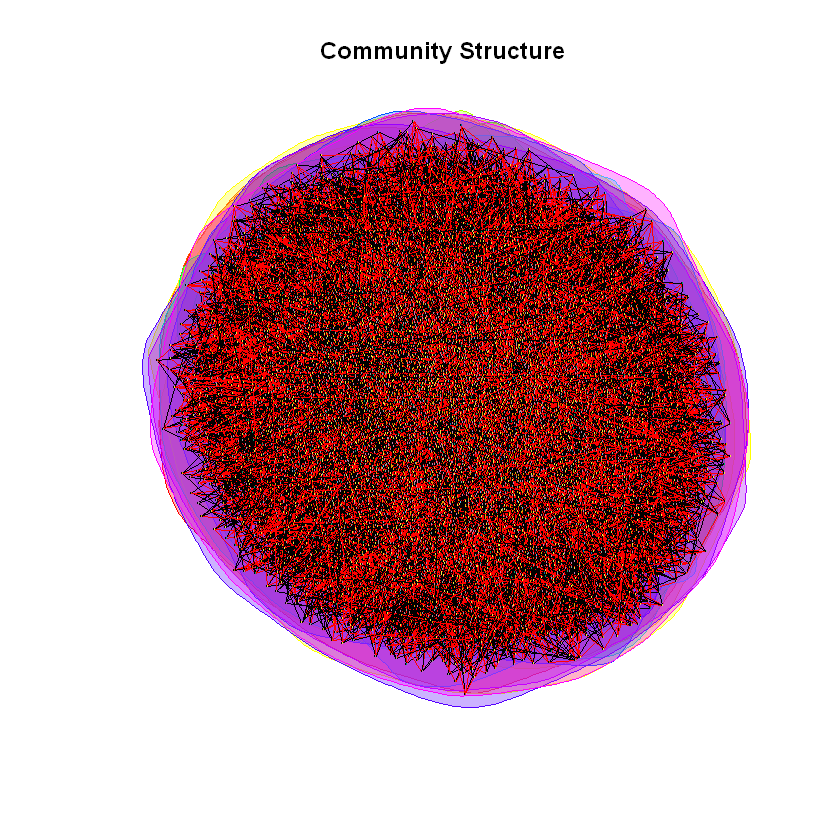

In [22]:
#2.c
g=barabasi.game(10000,m=5,directed=F)
cat("The graph is connected: ",is_connected(g))
#community structure list
community=cluster_fast_greedy(g)
#modularity
mod=modularity(community)
cat("Modularity is ",mod)
plot(community,g,main="Community Structure",vertex.size=0.2,vertex.label=NA)


Call:
lm(formula = log_dd ~ log_d)

Coefficients:
(Intercept)        log_d  
      1.680       -2.117  



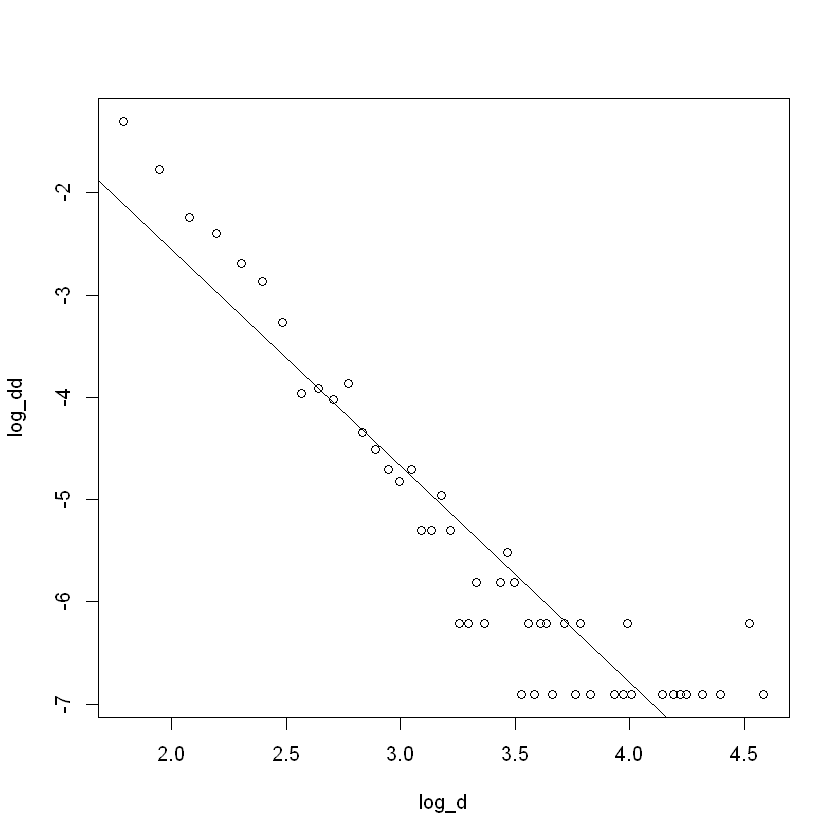

In [44]:
#2.d
g1=barabasi.game(1000,m=5,directed=F)
dd=degree_distribution(g1)
#get index which is nonzero
index=which(dd!=0)
#extract degree distribution corresponding to nonzero index
log_dd=log(dd)[index]
log_d=log(seq(1:length(dd)))[index]

#Fit a linear model
model=lm(log_dd~log_d)
#plot scatter and model together
plot(log_d,log_dd,abline(model))
#print out coefficient of model
print(model)


Call:
lm(formula = log_dd2 ~ log_d2)

Coefficients:
(Intercept)       log_d2  
     0.7153      -2.3575  



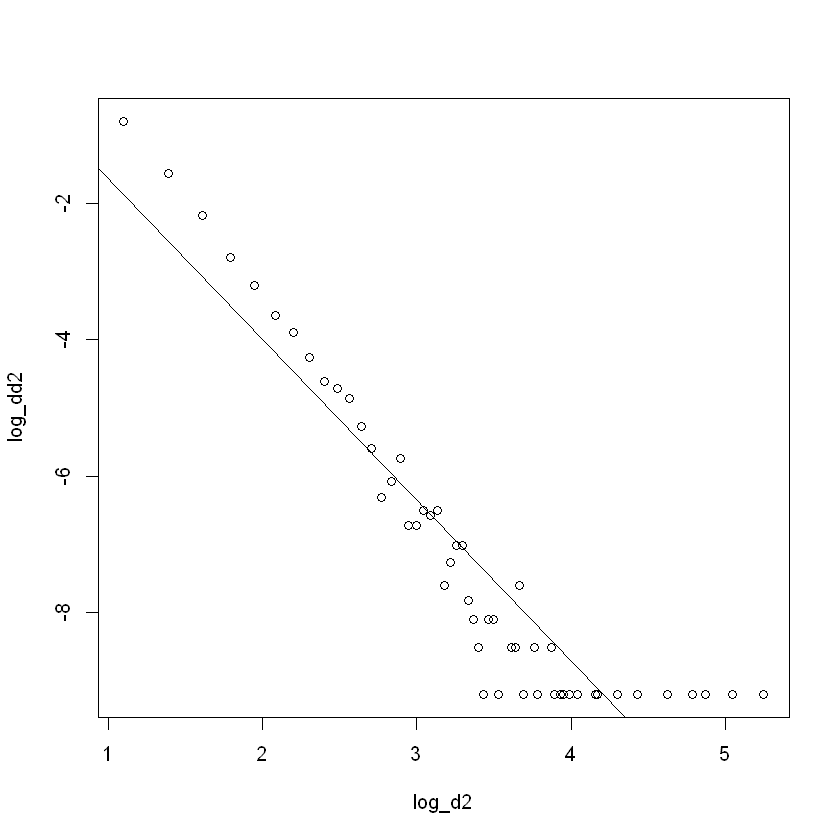

In [52]:
g2=barabasi.game(10000,m=2,directed=F)
dd2=degree_distribution(g2)
#get index which is nonzero
index=which(dd2!=0)
#extract degree distribution corresponding to nonzero index
log_dd2=log(dd2)[index]
log_d2=log(seq(1:length(dd2)))[index]

#Fit a linear model
model2=lm(log_dd2~log_d2)
#plot scatter and model together
plot(log_d2,log_dd2,abline(model2))
#print out coefficient of model
print(model2)

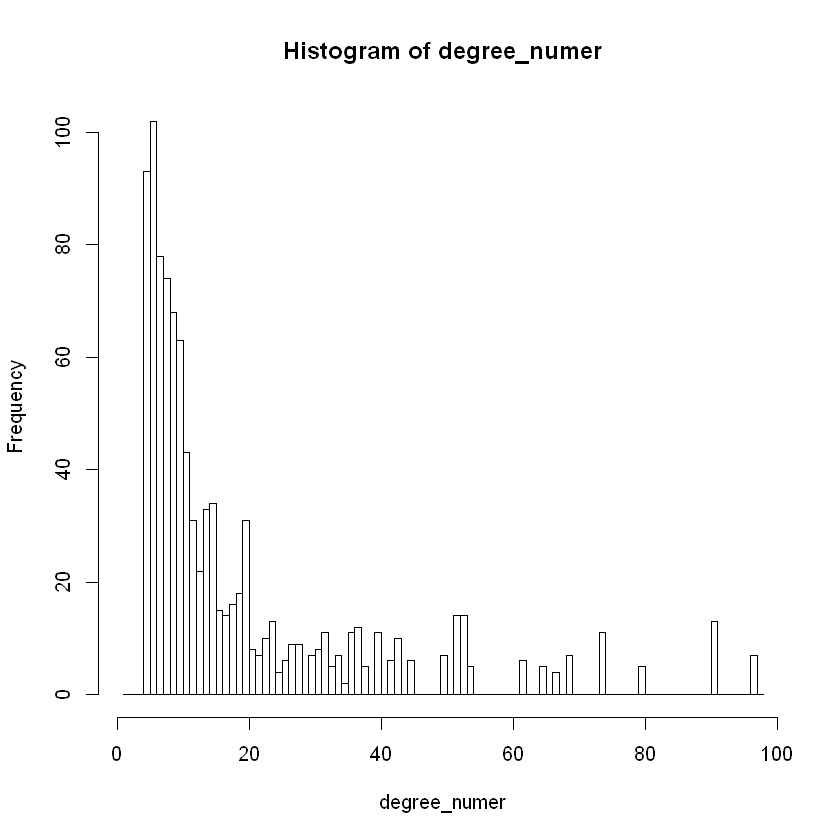


Call:
lm(formula = log_dd1 ~ log_d1)

Coefficients:
(Intercept)       log_d1  
    -1.2451      -0.9641  



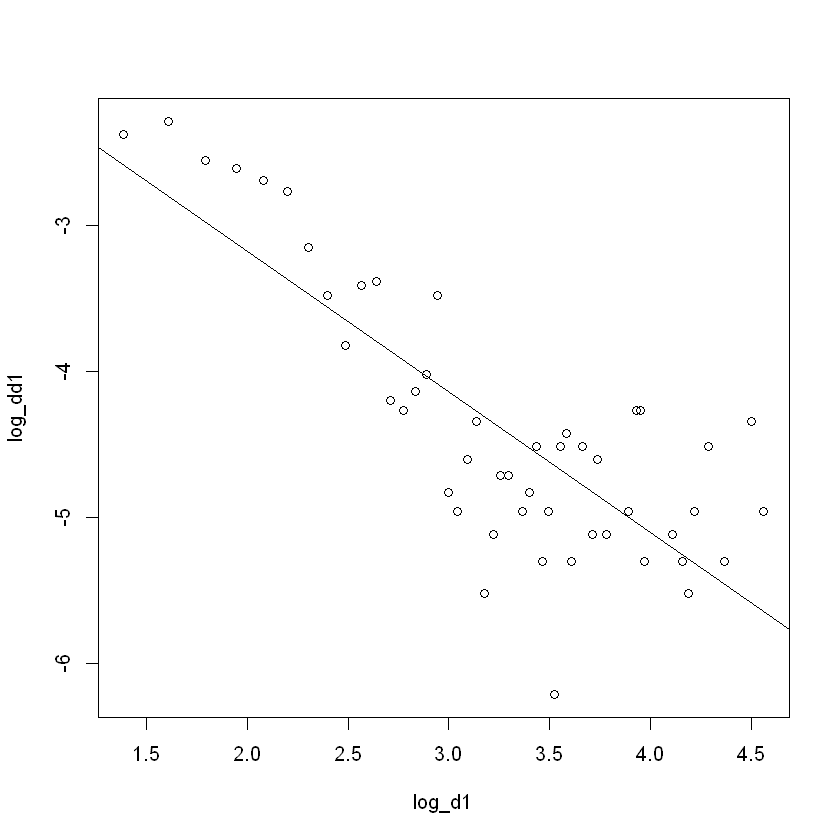

In [53]:
#2.e
#For n=1000
#randomly choose a node and save index

iteration=1000
degree_list=vector(mode="list",length=0)
for (i in 1:iteration){
    node_index=sample(1000,1)
    nb_node_i=neighbors(g1,node_index)
    if (length(nb_node_i)==1){
        node_j=nb_node_i
    }else{
        node_j=sample(nb_node_i,1)
    }
    #save the corresponding node j's degree
    degree_list=c(degree_list,degree(g1,node_j))
}
degree_numer=unlist(degree_list,use.names=FALSE)
histogram=hist(degree_numer,seq(0:max(degree_numer)))
dd1=histogram$density

index=which(dd1!=0)
#extract degree distribution corresponding to nonzero index
log_dd1=log(dd1)[index]
log_d1=log(seq(1:length(dd1)))[index]

#Fit a linear model
model1=lm(log_dd1~log_d1)
#plot scatter and model together
plot(log_d1,log_dd1,abline(model1))
#print out coefficient of model
print(model1)


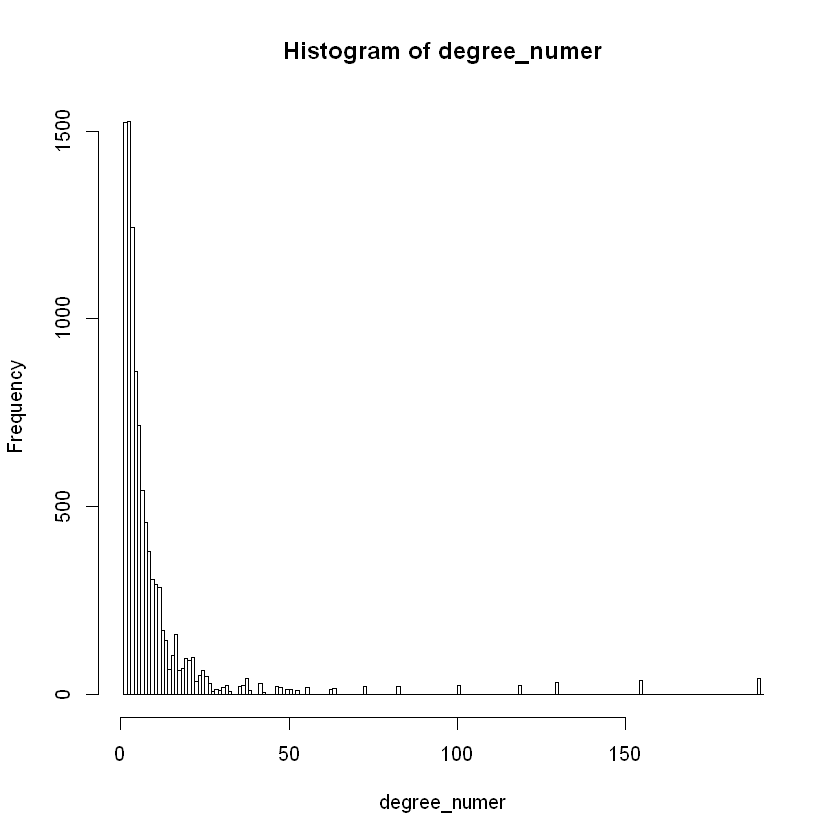


Call:
lm(formula = log_dd2 ~ log_d2)

Coefficients:
(Intercept)       log_d2  
     -1.509       -1.151  



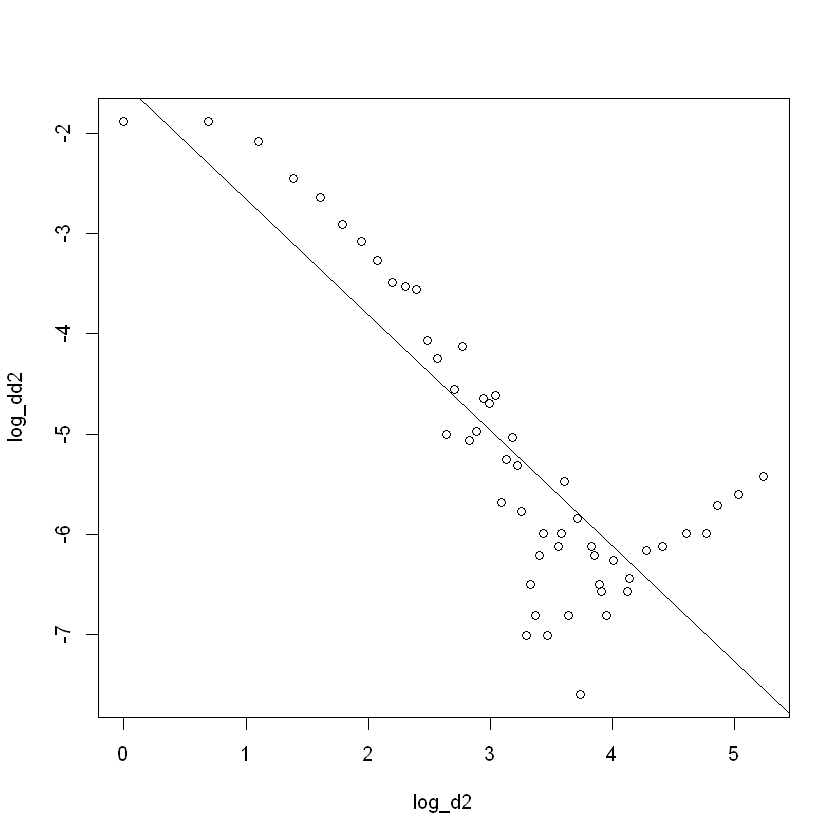

In [54]:
#For n=10000
#randomly choose a node and save index

iteration=10000
degree_list=vector(mode="list",length=0)
for (i in 1:iteration){
    node_index=sample(10000,1)
    nb_node_i=neighbors(g2,node_index)
    if (length(nb_node_i)==1){
        node_j=nb_node_i
    }else{
        node_j=sample(nb_node_i,1)
    }
    #save the corresponding node j's degree
    degree_list=c(degree_list,degree(g2,node_j))
}
degree_numer=unlist(degree_list,use.names=FALSE)
histogram=hist(degree_numer,seq(0:max(degree_numer)))
#use histogram to get distribution
dd2=histogram$density
#fine nonzero value index
index=which(dd2!=0)
#extract degree distribution corresponding to nonzero index
log_dd2=log(dd2)[index]
log_d2=log(seq(1:length(dd2)))[index]

#Fit a linear model
model2=lm(log_dd2~log_d2)
#plot scatter and model together
plot(log_d2,log_dd2,abline(model2))
#print out coefficient of model
print(model2)


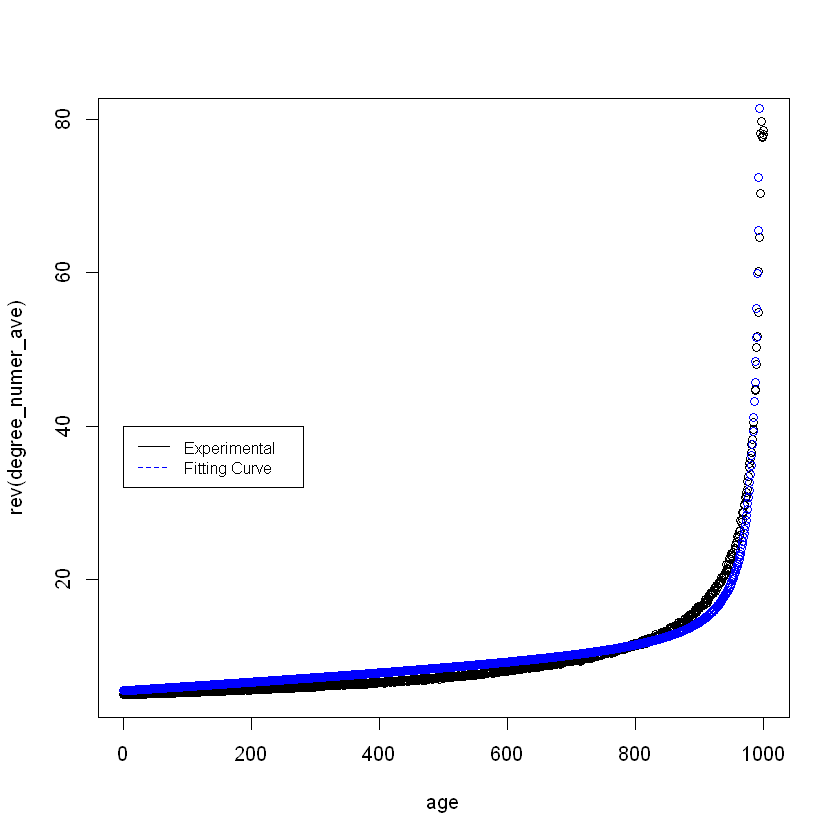

In [44]:
#2.f
step_max=1000
age=seq(1:step_max)
degree_numer=vector(mode="numeric",length=step_max)
for (i in 1:step_max){
    gf=barabasi.game(1000,m=5,directed=F)#n=1000,m=1
    #calculate the sum of degree of each node
    degree_numer=degree_numer+degree(gf)
}
#Estimated Fitting Curve
m=5
Fit=500/(1000-age)+m*0.001*age+m
degree_numer_ave=degree_numer/step_max
plot(age,rev(degree_numer_ave))#node index need to be reversed to represent the age correspondingly
points(Fit,col='blue')
legend(0,40,legend=c("Experimental","Fitting Curve"),col=c("black","blue"),lty=1:2,cex=0.8)

# Question 2.h
Again, generate a preferential attachment network with n = 1000, m = 1. Take its degree sequence and create a new network with the same degree sequence, through stub-matching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Compare the two procedures for creating random power-law networks. 

In [37]:
#The original graph
gh=barabasi.game(n=1000,m=1,directed=F)
#extract degree information
gh_deg=degree(gh)
#resample another graph using degree information of original graph
gh_sub=sample_degseq(gh_deg,method='simple.no.multiple')

Modularity of original graph is  0.9326599Modularity of stub matching graph is  0.8333884

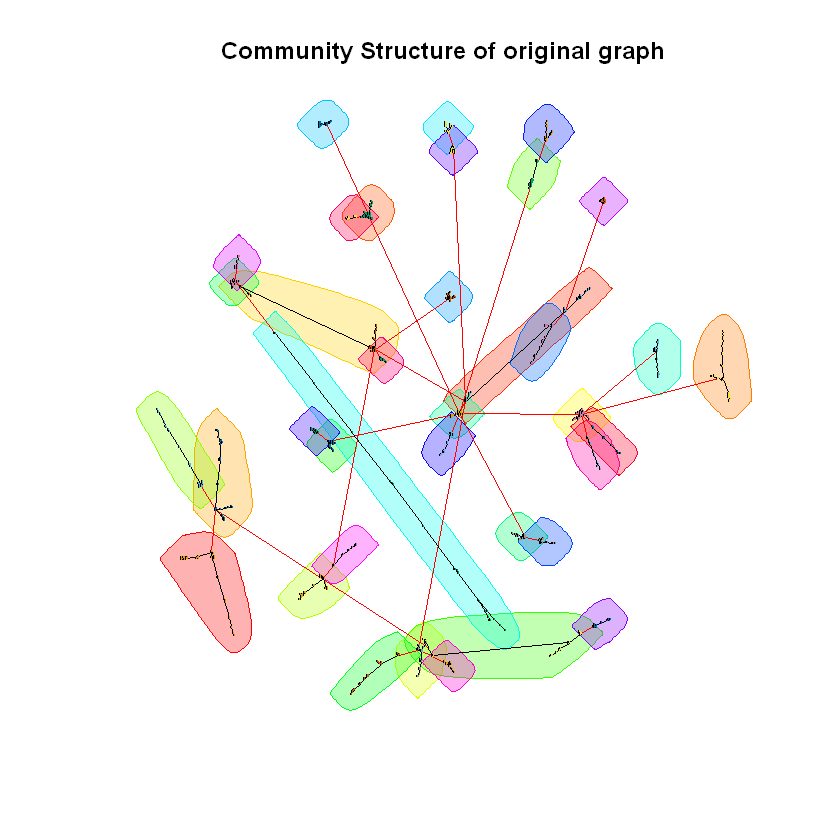

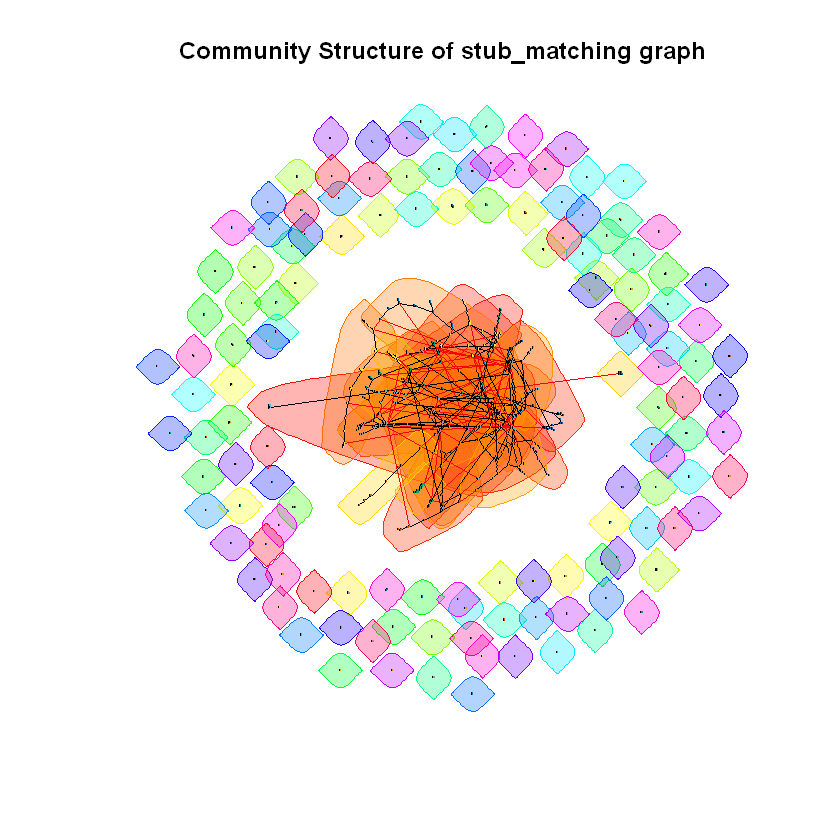

In [38]:
#plot both network and mark communities on their plots
community=fastgreedy.community(gh)
#modularity
mod=modularity(community)
cat("Modularity of original graph is ",mod)
plot(community,gh,main="Community Structure of original graph",vertex.size=0.2,vertex.label=NA)

community_sub=fastgreedy.community(gh_sub)
#modularity
mod_sub=modularity(community_sub)
cat("Modularity of stub matching graph is ",mod_sub)
plot(community_sub,gh_sub,main="Community Structure of stub_matching graph",vertex.size=0.2,vertex.label=NA)